### Problem Statement

You are a data scientist working on a classification problem to predict whether a hotel reservation will be canceled or not. You have been provided with a dataset named **`"hotel_reservations.csv"`**, which includes various attributes related to hotel bookings. The dataset comprises the following columns:

- `booking_id:` unique identifier of each booking
- `no_of_adults:` Number of adults
- `no_of_children:` Number of Children
- `no_of_weekend_nights:` Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- `no_of_week_nights:` Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- `type_of_meal_plan:` Type of meal plan booked by the customer
- `required_car_parking_space:` Does the customer require a car parking space? (0 - No, 1- Yes)
- `room_type_reserved:` Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels
- `lead_time:` Number of days between the date of booking and the arrival date
- `arrival_year:` Year of arrival date
- `arrival_month:` Month of arrival date
- `arrival_date:` Date of the month
- `market_segment_type:` Market segment designation
- `repeated_guest:` Is the customer a repeated guest? (0 - No, 1- Yes)
- `no_of_previous_cancellations:` Number of previous bookings that were canceled by the customer prior to the current booking
- `no_of_previous_bookings_not_canceled:` Number of previous bookings not canceled by the customer prior to the current booking
- `avg_price_per_room:` Average price per day of the reservation; prices of the rooms are dynamic (in euros)
- `no_of_special_requests:` Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- `booking_status:` Flag indicating if the booking was canceled or not (Not_Canceled = 0, Canceled = 1)


You will perform data preprocessing, exploratory data analysis, and model training using different algorithms, including logistic regression, decision tree, random forest, and Naive Bayes. Additionally, you will implement k-fold cross-validation, stratified k-fold cross-validation, grid search, and randomized search techniques.

**Dataset Credits:** Ahsan Raza (https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)

**Import Necessary Libraries**


In [30]:
# Import Necessary Libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

### Task 1: Data Preprocessing and EDA

1. Import the data from the `"hotel_reservations.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
5. Remove the columns `booking_id, arrival_year, arrival_month, and arrival_date` as they do not add significant value to the predictive model.
6. Visualize the booking_status using a count plot.
7. Visualize the lead time for canceled and not canceled bookings using a box plot.
8. Visualize the average price per room for canceled and not canceled bookings using a box plot.
9. Encode categorical variables: type_of_meal_plan, room_type_reserved, and market_segment_type using one-hot encoding.

In [31]:
# Import the data from the "hotel_reservations.csv" file and store it in a variable df.
df = pd.read_csv('hotel_reservations.csv')

# Display the number of rows and columns in the dataset
print(f'Number of Rows: {df.shape[0]}, Cols: {df.shape[1]}')

# Display the first few rows of the dataset to get an overview
df.head()

Number of Rows: 36275, Cols: 19


,booking_id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [32]:
# Remove the columns booking_id, arrival_year, arrival_month, and arrival_date
cols_to_drop = ['booking_id', 'arrival_year', 'arrival_month', 'arrival_date']
df.drop(cols_to_drop, axis=1, inplace=True)

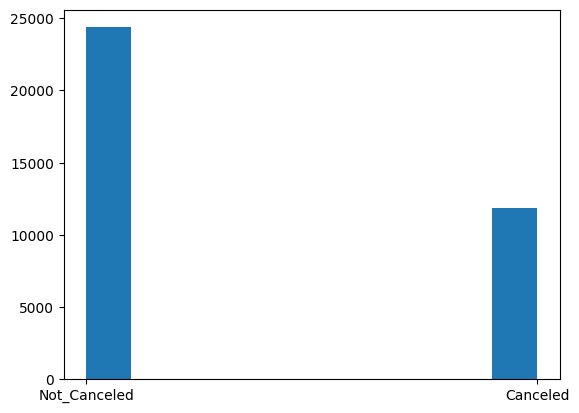

In [33]:
# Visualize the booking_status
plt.hist(df['booking_status'])
plt.show()

In [34]:
def myBoxPlot(catY, catX):
    sns.boxplot(data=df, x=catX, y=catY)
    plt.title(f'{catY} by {catX}')
    plt.xlabel(catX)
    plt.ylabel(catY)
    plt.show()

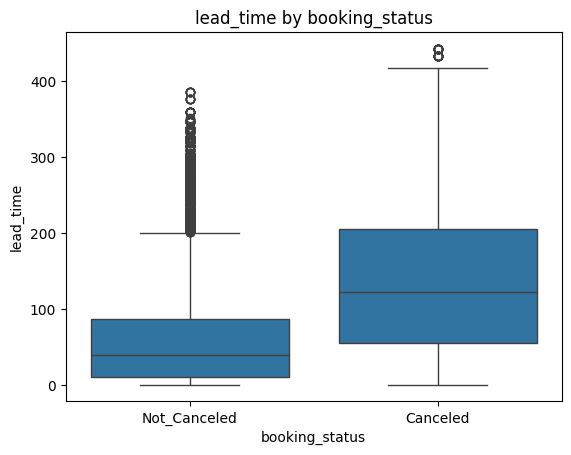

In [35]:
# Visualize the lead time for canceled and not canceled bookings using a box plot
myBoxPlot(catY='lead_time', catX='booking_status')

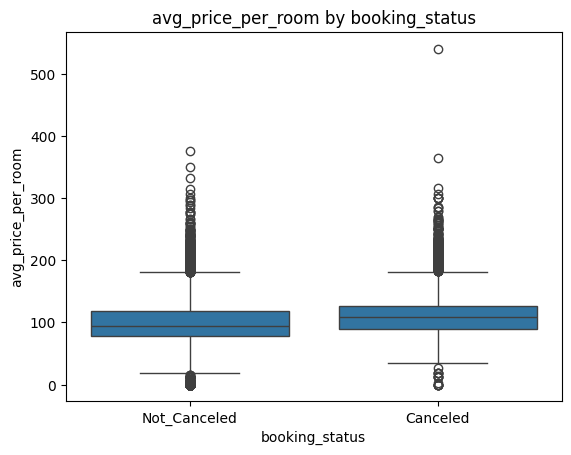

In [36]:
# Visualize the average price per room for canceled and not canceled bookings
myBoxPlot(catY='avg_price_per_room', catX='booking_status')

In [37]:
# Encode categorical variables : type_of_meal_plan, room_type_reserved, and market_segment_type using one-hot encoding.
cols_to_ohe = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
# One-hot encode all categorical columns
df_encoded = pd.get_dummies(df, columns=cols_to_ohe, drop_first=True)
df_encoded.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,0,0,0,65.00,...,False,False,False,False,False,False,False,False,True,False
1,2,0,2,3,0,5,0,0,0,106.68,...,False,False,False,False,False,False,False,False,False,True
2,1,0,2,1,0,1,0,0,0,60.00,...,False,False,False,False,False,False,False,False,False,True
3,2,0,0,2,0,211,0,0,0,100.00,...,False,False,False,False,False,False,False,False,False,True
4,2,0,1,1,0,48,0,0,0,94.50,...,False,False,False,False,False,False,False,False,False,True


### Task 2: Feature Scaling

1. Standardize the numerical features `lead_time` and `avg_price_per_room`.
2. Define features (X) and target (y).

In [38]:
# Standardize the numerical features

numerical_cols = ['lead_time', 'avg_price_per_room']
scaler = StandardScaler()

df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
df_encoded.head()
# Define features(X) and target (y: booking_status)
y = df_encoded['booking_status']
X = df_encoded.drop('booking_status', axis=1)
df_encoded.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,1.614896,0,0,0,-1.095033,...,False,False,False,False,False,False,False,False,True,False
1,2,0,2,3,0,-0.933701,0,0,0,0.092806,...,False,False,False,False,False,False,False,False,False,True
2,1,0,2,1,0,-0.980250,0,0,0,-1.237528,...,False,False,False,False,False,False,False,False,False,True
3,2,0,0,2,0,1.463610,0,0,0,-0.097567,...,False,False,False,False,False,False,False,False,False,True
4,2,0,1,1,0,-0.433291,0,0,0,-0.254312,...,False,False,False,False,False,False,False,False,False,True


### Task 3: Implementing K-Fold Cross Validation

1. Initialize a KFold cross-validator with 7 splits.
2. Perform k-fold cross-validation using Naive Bayes and calculate the average accuracy.
3. Perform k-fold cross-validation using a Logistic Regression and calculate the average accuracy.
4. Perform k-fold cross-validation using a decision tree classifier and calculate the average accuracy.

In [40]:

# Initialize KFold with 7 splits.
kf = KFold(n_splits=7, shuffle=True, random_state=42)

# Cross validation with Naive Bayes
model_nb = GaussianNB()
scores_nb = cross_val_score(model_nb, X, y, cv=kf)
print("Naive Bayes Cross-Validation Accuracy: ", scores_nb.mean())

# Cross validation with Logistic Regression
model_lr = LogisticRegression()
scores_lr = cross_val_score(model_lr, X, y, cv=kf)
print("Logistic Regression Cross-Validation Accuracy: ", scores_lr.mean())

# Cross validation with Decision Tree
model_dt = DecisionTreeClassifier()
scores_dt = cross_val_score(model_dt, X, y, cv=kf)
print("Decision Tree Cross-Validation Accuracy: ", scores_dt.mean())

Naive Bayes Cross-Validation Accuracy:  0.4086008945293444
Logistic Regression Cross-Validation Accuracy:  0.80044102558069
Decision Tree Cross-Validation Accuracy:  0.8568988570718389


### Task 4: Implementing Stratified K-Fold Cross Validation

1. Initialize a StratifiedKFold cross-validator with 7 splits
2. Perform stratified k-fold cross-validation using Naive Bayes and calculate the average accuracy.
3. Perform stratified k-fold cross-validation using a Logistic Regression and calculate the average accuracy.
4. Perform stratified k-fold cross-validation using a Decision Tree classifier and calculate the average accuracy.

In [41]:
# Initialize a StratifiedKFold cross-validator with 7 splits
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Perform stratified k-fold cross-validation using Naive Bayes
model_nb_skf = GaussianNB()
scores_nb_skf = cross_val_score(model_nb_skf, X, y, cv=skf)
print("Naive Bayes Cross-Validation Accuracy: ", scores_nb_skf.mean())

# Perform stratified k-fold cross-validation using a Logistic Regression
model_lr_skf = LogisticRegression()
scores_lr_skf = cross_val_score(model_lr_skf, X, y, cv=skf)
print("Logistic Regression Cross-Validation Accuracy: ", scores_lr_skf.mean())

# Perform stratified k-fold cross-validation using a Decision Tree classifier
model_dt_skf = DecisionTreeClassifier()
scores_dt_skf = cross_val_score(model_dt_skf, X, y, cv=skf)
print("Decision Tree Cross-Validation Accuracy: ", scores_dt_skf.mean())

Naive Bayes Cross-Validation Accuracy:  0.40862851035462067
Logistic Regression Cross-Validation Accuracy:  0.7996416346692049
Decision Tree Cross-Validation Accuracy:  0.8583872660153197


### Task 5: Implementing Grid Search CV

1. Initialize GridSearchCV with Naive Bayes and Random Forest:
    - Naive Bayes: var_smoothing [1e-9, 1e-8, 1e-7]
    - Random Forest: n_estimators [10, 50, 100], max_depth [5, 10, 15]
<br></br>
2. Fit GridSearchCV with Naive Bayes and Random Forest, and find the best parameters.
3. Print the best parameters for each model.

In [42]:
# Initialize GridSearchCV with Naive Bayes and Random Forest 

model_params = {
    'gaussian_nb': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': [1e-9,1e-8,1e-7],
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [5, 10, 15],
        }
    }
}

# Fit GridSearchCV with Naive Bayes and Random Forest, and find the best parameters.
scores = []

for key, val in model_params.items():
    clf = GridSearchCV(val['model'], val['params'], cv=skf, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': key,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

# Print the best parameters for each model.
df = pd.DataFrame(scores)
df

,model,best_score,best_params
0,gaussian_nb,0.409483,{'var_smoothing': 1e-07}
1,random_forest,0.877326,"{'max_depth': 15, 'n_estimators': 100}"


### Task 6: Implementing Randomized Search CV

1. Initialize RandomizedSearchCV for RandomForest with the given parameters:
   - Random Forest: n_estimators [10, 50, 100], max_depth [5, 10, 15, 20]
<br></br>
2. Fit RandomizedSearchCV with RandomForest model and find the best parameters.
2. Print the best parameters.

In [45]:
# Initialize RandomizedSearchCV and fit with RandomForest model

params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, 15, 20],
}
clf_random = RandomizedSearchCV(RandomForestClassifier(), params, cv=skf, return_train_score=False)
clf_random.fit(X, y)

# Print Best Parameters
print(f'The best score was : {clf_random.best_score_}')
print(f'The best parameters were : {clf_random.best_params_}')

The best score was : 0.8871949864809577
The best parameters were : {'n_estimators': 50, 'max_depth': 20}
